In [1]:
import os
from PIL import Image
import matplotlib.pyplot as plt

In [10]:
recreate = False

# Define directories
orig_image_dir = 'data/training/images/'
orig_gt_dir = 'data/training/groundtruth/'
aug_image_dir = 'data/training_augmented/images/'
aug_gt_dir = 'data/training_augmented/groundtruth/'

if recreate: 

    # Create the directories if they don't exist
    if not os.path.exists(aug_image_dir):
        os.makedirs(aug_image_dir)

    if not os.path.exists(aug_gt_dir):
        os.makedirs(aug_gt_dir)

    # List of transformations to apply
    transformations = ['original', 'flip', 'rotate', 'scale']

    # Parameters for transformations
    angles = [45, 90, 135, 180, 225, 270, 315]
    directions = ['horizontal', 'vertical']
    scales = [1.25, 1.5, 1.75, 2]

    # Loop over all images
    for image_filename in os.listdir(orig_image_dir):
        label_filename = image_filename  # Mask has the same filename as the image

        # Load the image and mask
        image = Image.open(os.path.join(orig_image_dir, image_filename))
        label = Image.open(os.path.join(orig_gt_dir, label_filename))

        # Apply the transformations
        for transformation in transformations:
            if transformation == 'original':
                transf_image = image
                transf_label = label

                # Save the transformed images and masks
                transf_image.save(os.path.join(aug_image_dir, f'o_{image_filename}'))
                transf_label.save(os.path.join(aug_gt_dir, f'o_{label_filename}'))
                
            if transformation == 'rotate':
                for angle in angles:
                    transf_image = image.rotate(angle)
                    transf_label = label.rotate(angle)

                    # Save the transformed images and masks
                    transf_image.save(os.path.join(aug_image_dir, f'r{angle}_{image_filename}'))
                    transf_label.save(os.path.join(aug_gt_dir, f'r{angle}_{label_filename}'))

            elif transformation == 'flip':
                for direction in directions:
                    if direction == 'horizontal':
                        transf_image = image.transpose(Image.FLIP_LEFT_RIGHT)
                        transf_label = label.transpose(Image.FLIP_LEFT_RIGHT)

                        # Save the transformed images and masks
                        transf_image.save(os.path.join(aug_image_dir, f'fh_{image_filename}'))
                        transf_label.save(os.path.join(aug_gt_dir, f'fh_{label_filename}'))

                    elif direction == 'vertical':
                        transf_image = image.transpose(Image.FLIP_TOP_BOTTOM)
                        transf_label = label.transpose(Image.FLIP_TOP_BOTTOM)

                        # Save the transformed images and masks
                        transf_image.save(os.path.join(aug_image_dir, f'fv_{image_filename}'))
                        transf_label.save(os.path.join(aug_gt_dir, f'fv_{label_filename}'))
                    
            elif transformation == 'scale':
                for scale in scales:
                    transf_image = image.resize((int(image.size[0] * scale), int(image.size[1] * scale)))
                    transf_label = label.resize((int(label.size[0] * scale), int(label.size[1] * scale)))

                    # Crop the images to the original size
                    transf_image = transf_image.crop((0, 0, image.size[0], image.size[1]))
                    transf_label = transf_label.crop((0, 0, label.size[0], label.size[1]))

                    # Save the transformed images and masks
                    transf_image.save(os.path.join(aug_image_dir, f's{scale}_{image_filename}'))
                    transf_label.save(os.path.join(aug_gt_dir, f's{scale}_{label_filename}'))

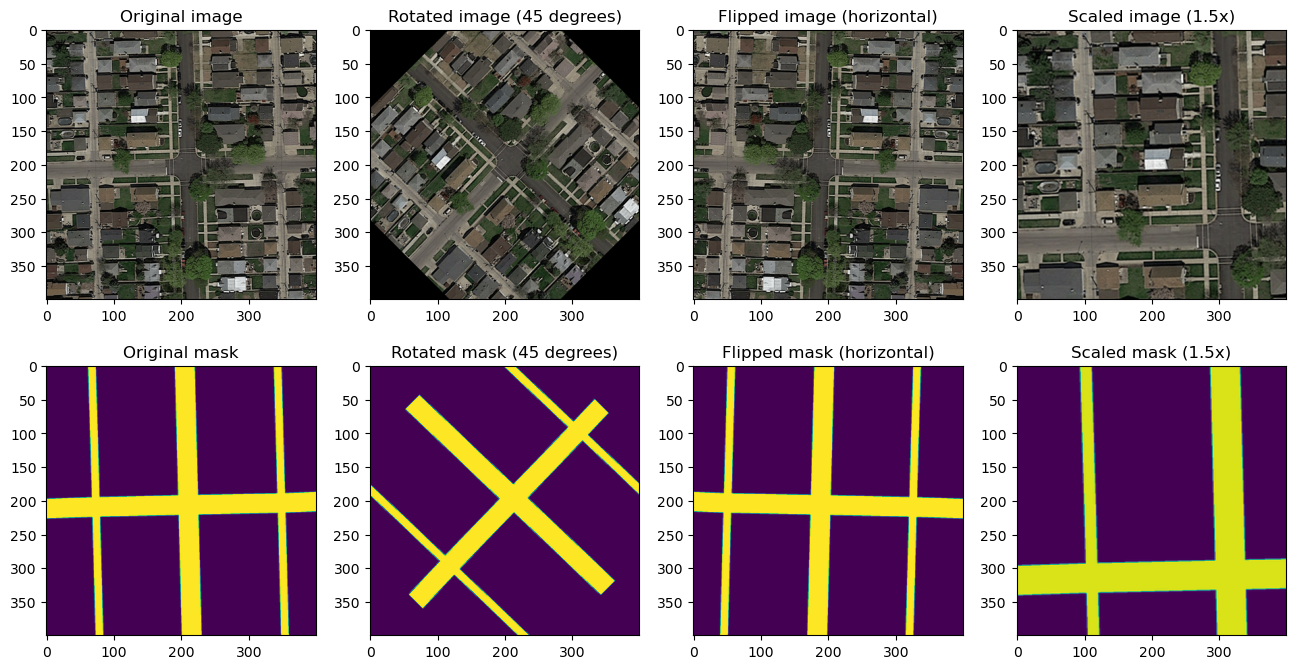

In [11]:
# Visualize the results
# Create a figure with subplots of the original image (top row) and the transformed images (bottom row)
# Display:
# training/images/satImage_001.png, training/groundtruth/satImage_001.png
# training_augmented/images/r45_satImage_001.png, training_augmented/groundtruth/r45_satImage_001.png
# training_augmented/images/fh_satImage_001.png, training_augmented/groundtruth/fh_satImage_001.png
# training_augmented/images/s_satImage_001.png, training_augmented/groundtruth/s_satImage_001.png

# Define directories
aug_image_dir = 'data/training_augmented/images/'
aug_gt_dir = 'data/training_augmented/groundtruth/'

image_number = '001'
angle = 45
scale = 1.5

# Load the images and masks
image = Image.open(os.path.join(aug_image_dir, f'o_satImage_{image_number}.png'))
label = Image.open(os.path.join(aug_gt_dir, f'o_satImage_{image_number}.png'))

image_r45 = Image.open(os.path.join(aug_image_dir, f'r{angle}_satImage_{image_number}.png'))
label_r45 = Image.open(os.path.join(aug_gt_dir, f'r{angle}_satImage_{image_number}.png'))

image_fh = Image.open(os.path.join(aug_image_dir, f'fh_satImage_{image_number}.png'))
label_fh = Image.open(os.path.join(aug_gt_dir, f'fh_satImage_{image_number}.png'))

image_s = Image.open(os.path.join(aug_image_dir, f's{scale}_satImage_{image_number}.png'))
label_s = Image.open(os.path.join(aug_gt_dir, f's{scale}_satImage_{image_number}.png'))

# Create a figure with subplots of the original image (top row) and the transformed images (bottom row)
fig, ax = plt.subplots(2, 4, figsize=(16, 8))
ax[0, 0].imshow(image)
ax[0, 0].set_title('Original image')
ax[1, 0].imshow(label)
ax[1, 0].set_title('Original mask')
ax[0, 1].imshow(image_r45)
ax[0, 1].set_title(f'Rotated image ({angle} degrees)')
ax[1, 1].imshow(label_r45)
ax[1, 1].set_title(f'Rotated mask ({angle} degrees)')
ax[0, 2].imshow(image_fh)
ax[0, 2].set_title('Flipped image (horizontal)')
ax[1, 2].imshow(label_fh)
ax[1, 2].set_title('Flipped mask (horizontal)')
ax[0, 3].imshow(image_s)
ax[0, 3].set_title(f'Scaled image ({scale}x)')
ax[1, 3].imshow(label_s)
ax[1, 3].set_title(f'Scaled mask ({scale}x)')
plt.show()